In [122]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [7]:
#1 IRIS data 
df = pd.read_csv("https://raw.githubusercontent.com/su-mt4007/data/refs/heads/main/IRIS.csv")

<AxesSubplot:xlabel='sepal_width', ylabel='petal_width'>

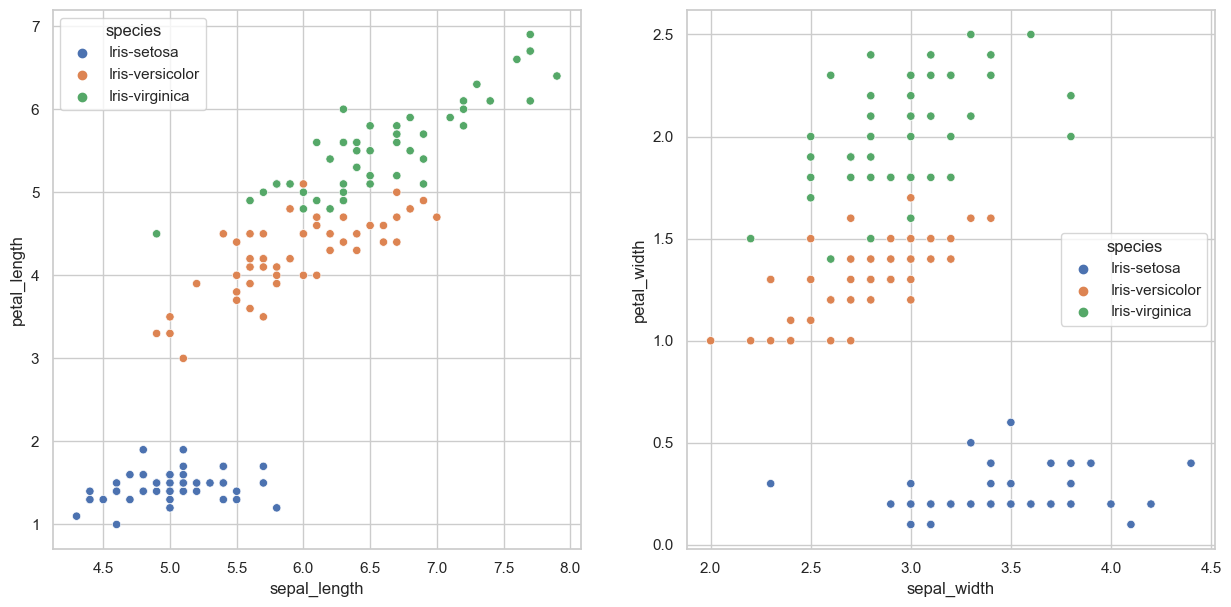

In [23]:
#1.1
sns.set(style="whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(15, 7))
sns.scatterplot(ax=axes[0], x = "sepal_length", y = "petal_length", hue = "species", data=df)
sns.scatterplot(ax=axes[1], x = "sepal_width", y = "petal_width", hue = "species", data=df)

What can you say about the relationship given the figure?

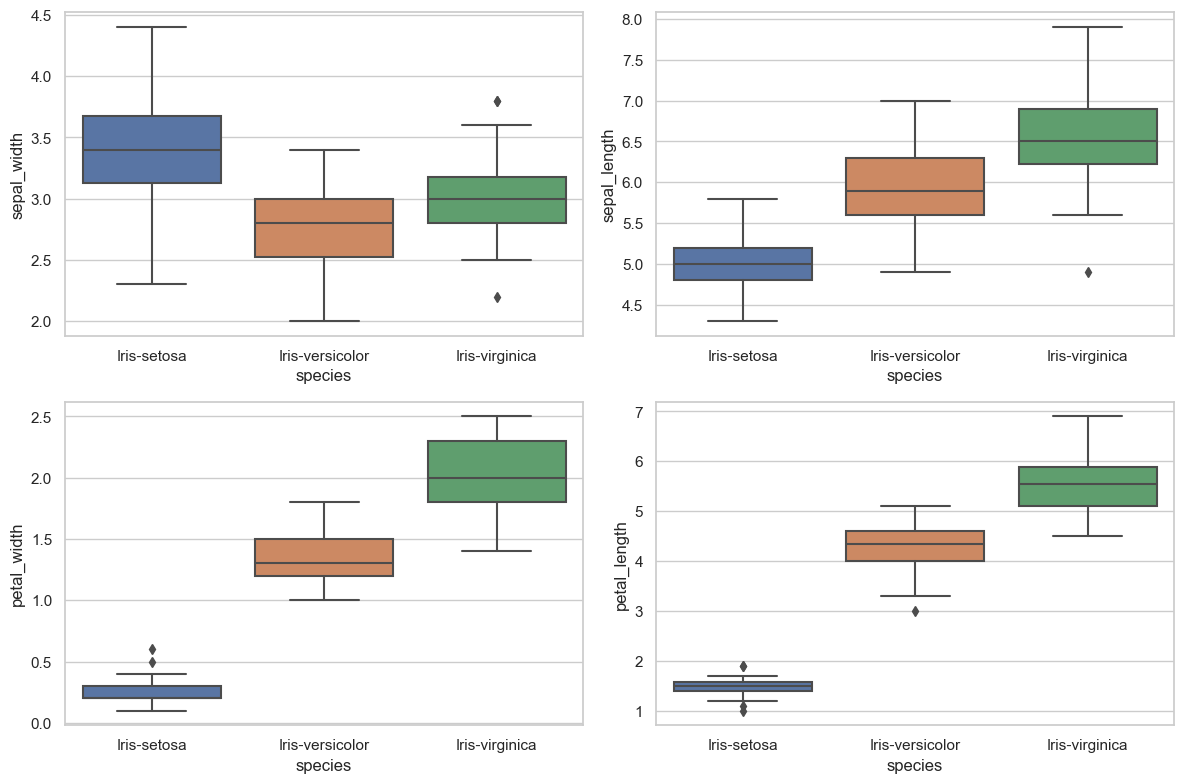

In [17]:
#1.2
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
sns.boxplot(x="species", y="sepal_width", data=df)

plt.subplot(2, 2, 2)
sns.boxplot(x="species", y="sepal_length", data=df)

plt.subplot(2, 2, 3)
sns.boxplot(x="species", y="petal_width", data=df)

plt.subplot(2, 2, 4)
sns.boxplot(x="species", y="petal_length", data=df)

plt.tight_layout()
plt.show()

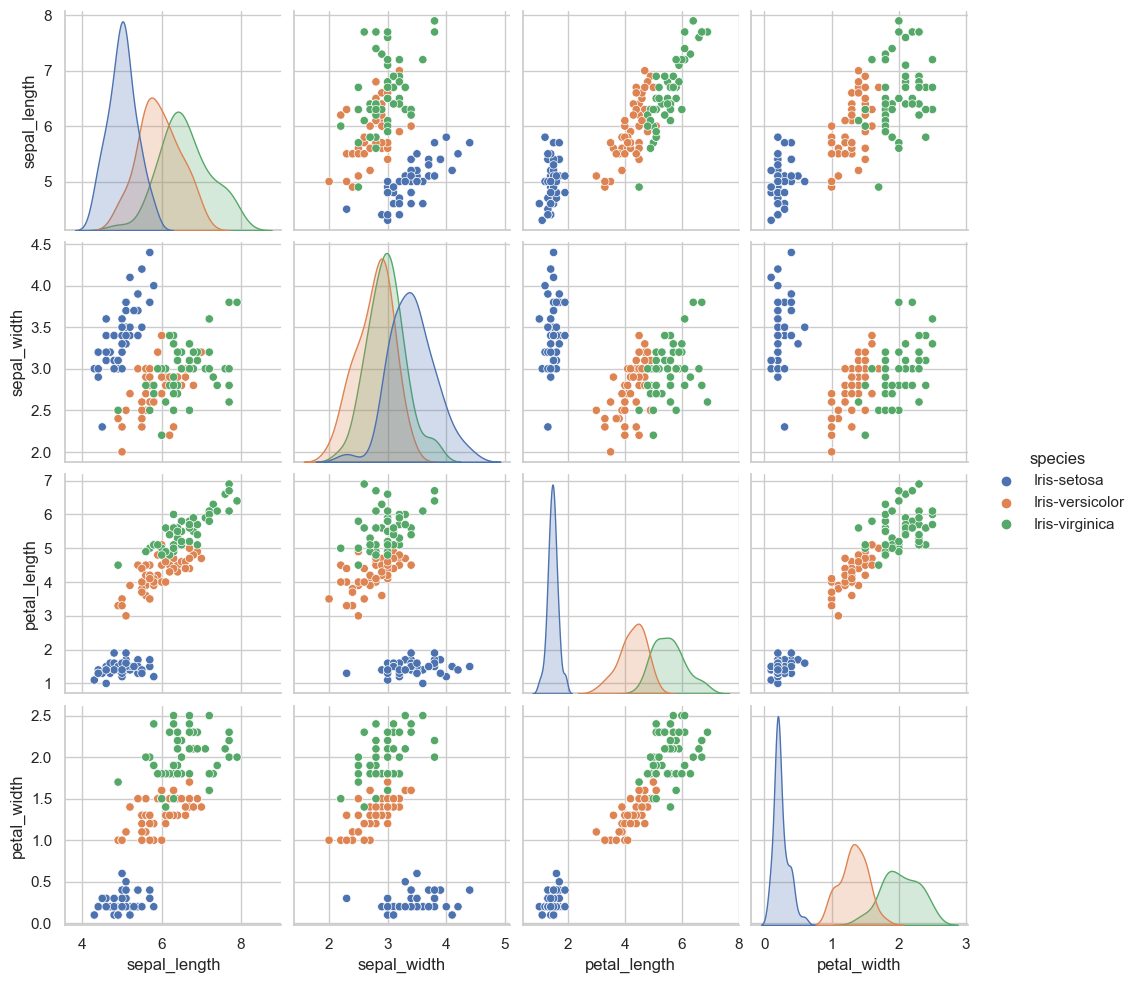

In [18]:
#1.3
sns.set(style="whitegrid")
sns.pairplot(df, hue="species")
plt.show()

In [201]:
#2 Birdwatching

df = pd.read_csv("https://raw.githubusercontent.com/su-mt4007/data/refs/heads/main/artportalen.csv")
df['Antal'] = pd.to_numeric(df['Antal'], errors='coerce')

#2.1 What are the most prevelant species?

sorted_df = df[["Artnamn", "Antal"]]
grouped_df = sorted_df.groupby("Artnamn").sum()
grouped_df["Total"]= grouped_df.sum(axis=1)
Sort_grouped = grouped_df.sort_values("Total", ascending=False).head(3)
Sort_grouped

Antal    Total
Artnamn                    
Grönsiska  20211.0  20211.0
Sothöna     8308.0   8308.0
Gräsand     7167.0   7167.0

In [183]:
#What is the monthly distribution of the top 3 most prevelant species?

condition1 = df["Artnamn"].str.contains("Grönsiska") 
Grönsiska = df[condition1][["Artnamn","Startdatum", "Antal"]]
Grönsiska["Year-Month"] = pd.to_datetime(Grönsiska["Startdatum"], format="%Y-%m-%d").dt.to_period("m")
grouped_grön = Grönsiska.groupby("Year-Month")["Antal"].sum()
print(grouped_grön)


condition2 = df["Artnamn"].str.contains("Sothöna")
Sothöna = df[condition2][["Artnamn","Startdatum", "Antal"]]
Sothöna["Year-Month"] = pd.to_datetime(Sothöna["Startdatum"], format="%Y-%m-%d").dt.to_period("m")
grouped_sot = Sothöna.groupby("Year-Month")["Antal"].sum()
print(grouped_sot)

condition3 = df["Artnamn"].str.contains("Gräsand")
Gräsand = df[condition3][["Artnamn","Startdatum", "Antal"]]
Gräsand["Year-Month"] = pd.to_datetime(Gräsand["Startdatum"], format="%Y-%m-%d").dt.to_period("m")
grouped_gräs = Gräsand.groupby("Year-Month")["Antal"].sum()
print(grouped_gräs)

Year-Month
2022-01    19507.0
2022-02      648.0
2022-03       33.0
2022-04        6.0
2022-05       10.0
2022-06        7.0
Freq: M, Name: Antal, dtype: float64
Year-Month
2022-01    2142.0
2022-02    2100.0
2022-03    3052.0
2022-04     614.0
2022-05     288.0
2022-06     112.0
Freq: M, Name: Antal, dtype: float64
Year-Month
2022-01    2953.0
2022-02    1583.0
2022-03    1152.0
2022-04     858.0
2022-05     515.0
2022-06     106.0
Freq: M, Name: Antal, dtype: float64


In [185]:
#What are the rarest species?

grouped_df.sort_values("Total", ascending=True).head(1)

Antal  Total
Artnamn                   
Ob. korsnäbb    0.0    0.0

In [195]:
#Which locations have the highest number of bird sightings?

location_counts = df['Kommun'].value_counts()

top_locations = location_counts.head(5)

print("Top Locations with the Highest Number of Bird Sightings:\n", top_locations)

Top Locations with the Highest Number of Bird Sightings:
 Stockholm     15436
Solna          4031
Sollentuna     2292
Lidingö         157
Name: Kommun, dtype: int64


Stockholm has the highest number of bird sightings, with 15,436, likely due to its larger population, biodiversity, and popularity among birdwatchers. Solna and Sollentuna follow with 4,031 and 2,292 sightings, suggesting these areas also have significant bird populations and suitable habitats. Lidingö, with only 157 sightings, likely has fewer birdwatchers or less favorable habitats. The higher sightings in Stockholm and Solna may indicate richer environments, while Lidingö's low numbers suggest a need for further investigation or promotion of birdwatching.

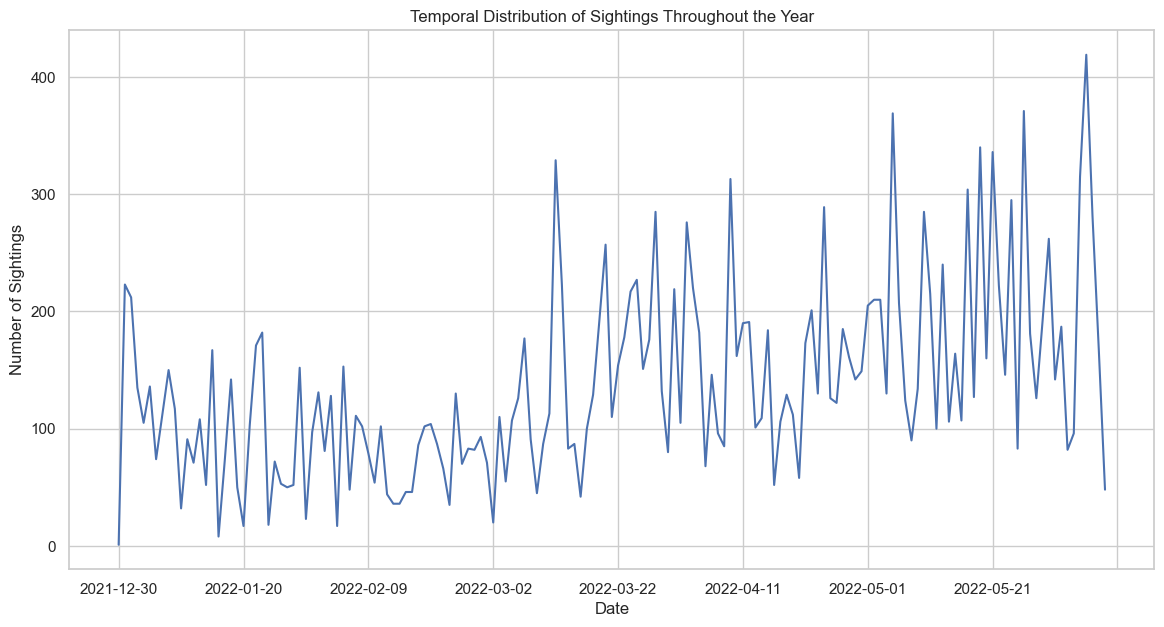

In [200]:
# Count the number of sightings per day
daily_counts = df['Startdatum'].value_counts().sort_index()

# Plot the temporal distribution of sightings
daily_counts.plot(kind='line', figsize=(14, 7), title='Temporal Distribution of Sightings Throughout the Year')
plt.xlabel('Date')
plt.ylabel('Number of Sightings')
plt.show()

Observations:
Seasonal Pattern: The number of sightings shows a clear seasonal pattern. There is a general upward trend in sightings as the year progresses from January to May.
Fluctuations: Sightings fluctuate considerably throughout the year. This could indicate variations in birdwatching activity, bird migration patterns, or both.
Low Activity Periods: There are periods of relatively low birdwatching activity, especially in January and February. This might be due to colder weather and less bird activity or fewer birdwatchers.

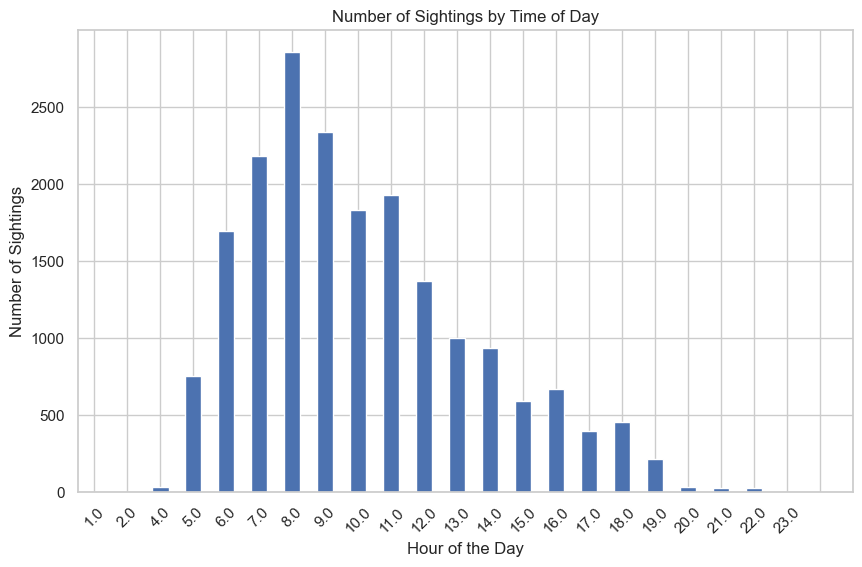

In [208]:
# Extract the hour from the start time to analyze daily trends
df['StartHour'] = pd.to_datetime(df['Starttid'], errors='coerce').dt.hour

# Count the number of sightings by hour
hourly_counts = df['StartHour'].value_counts().sort_index()

# Plot the distribution of sightings by time of day
plt.figure(figsize=(10, 6))
hourly_counts.plot(kind='bar', title='Number of Sightings by Time of Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Sightings')
plt.xticks(range(24), rotation=45)
plt.grid(True)
plt.show()

The high number of bird sightings at 08:00 am suggests that early morning is a peak period for bird activity, likely due to natural behaviors such as foraging and mating. This time is optimal for birdwatching, as birds are more active and visible. The pattern may also reflect favorable environmental conditions, like cooler temperatures and better light for observation. Understanding this peak can help birdwatchers plan more successful outings and provide insights into species-specific behavior.

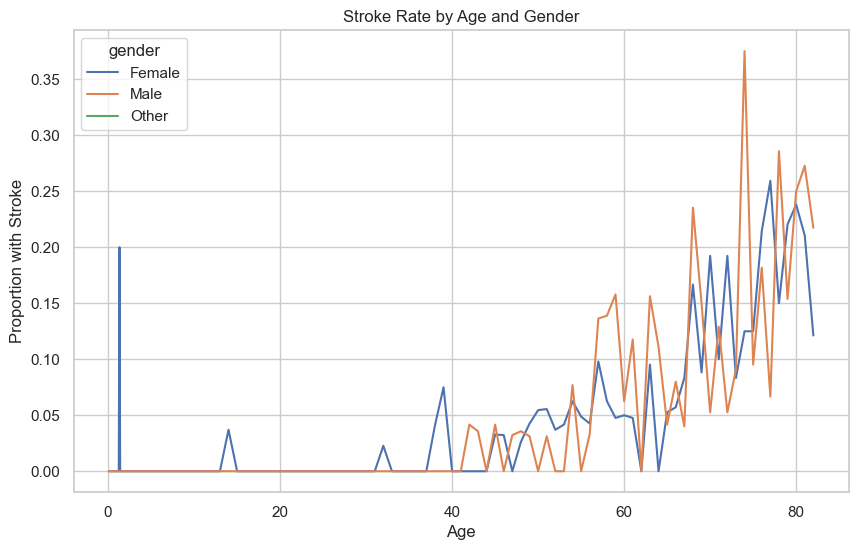

In [215]:
df = pd.read_csv("https://raw.githubusercontent.com/su-mt4007/data/refs/heads/main/stroke-data.csv")

# How does age and gender influence the likelihood of having a stroke?

age_gender_group = df.groupby(['age', 'gender'])['stroke'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=age_gender_group, x='age', y='stroke', hue='gender')
plt.title("Stroke Rate by Age and Gender")
plt.xlabel('Age')
plt.ylabel('Proportion with Stroke')
plt.show()

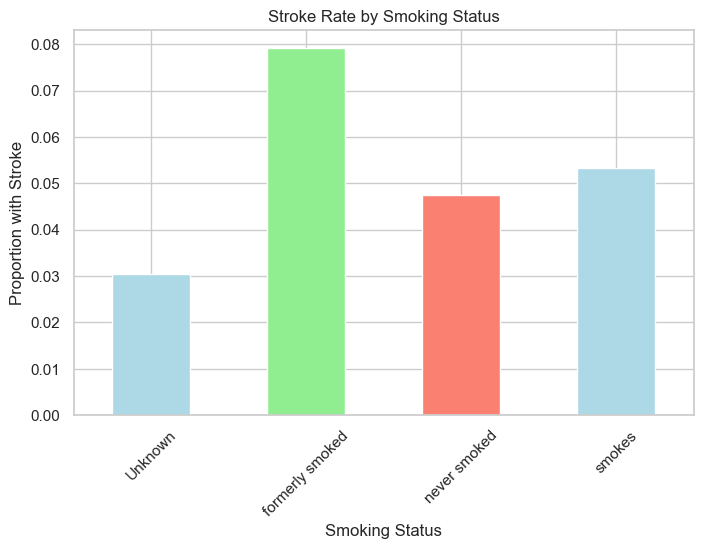

In [217]:
# Group by smoking status, calculate stroke rate
smoking_group = df.groupby('smoking_status')['stroke'].mean()

# Plot stroke rates by smoking status
smoking_group.plot(kind='bar', figsize=(8, 5), color=['lightblue', 'lightgreen', 'salmon'])
plt.title("Stroke Rate by Smoking Status")
plt.xlabel('Smoking Status')
plt.ylabel('Proportion with Stroke')
plt.xticks(rotation=45)
plt.show()

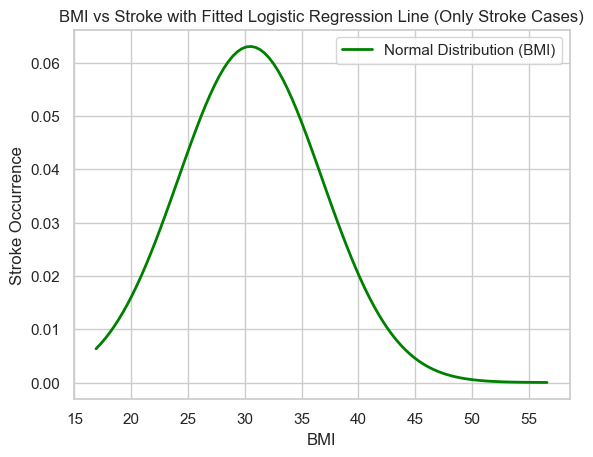

In [234]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

# Filter the data to only include those who had a stroke
df_stroke = df[df['stroke'] == 1]

# Generate and plot the normal distribution curve for BMI
bmi_mean = df_stroke['bmi'].mean()
bmi_std = df_stroke['bmi'].std()
x_values = np.linspace(df_stroke['bmi'].min(), df_stroke['bmi'].max(), 100)
normal_pdf = norm.pdf(x_values, loc=bmi_mean, scale=bmi_std)

# Overlay the normal distribution as a line plot
plt.plot(x_values, normal_pdf, color='green', label='Normal Distribution (BMI)', lw=2)

plt.title("BMI vs Stroke with Fitted Logistic Regression Line (Only Stroke Cases)")
plt.xlabel('BMI')
plt.ylabel('Stroke Occurrence')
plt.legend()
plt.show()

In [283]:
import pandas as pd

# Load the dataset from the URL
df = pd.read_csv("https://raw.githubusercontent.com/su-mt4007/data/refs/heads/main/cell_phones_total.csv")

# Define the function to convert 'k', 'M', 'B' to numeric, with error handling for invalid strings
def convert_to_numeric(value):
    if isinstance(value, str):
        # Check if the value contains 'k', 'M', or 'B' and convert accordingly
        if 'k' in value:
            try:
                return float(value.replace('k', '')) * 1e3
            except ValueError:
                return value  # Return the original value if conversion fails
        elif 'M' in value:
            try:
                return float(value.replace('M', '')) * 1e6
            except ValueError:
                return value  # Return the original value if conversion fails
        elif 'B' in value:
            try:
                return float(value.replace('B', '')) * 1e9
            except ValueError:
                return value  # Return the original value if conversion fails
    return value  # If it's not a string, return the original value

# Apply the conversion function to the entire DataFrame
df = df.applymap(convert_to_numeric)

# Fill missing values for the years >= 1979 with the average of the neighboring values
years = [str(year) for year in range(1979, 2020)]  # List of years from 1979 to 2019

for column in years:
    for i in range(1, len(df[column]) - 1):  # Start from 1 to avoid out-of-bounds errors
        if pd.isna(df[column].iloc[i]):  # Check if the value is missing (NaN)
            left_value = df[column].iloc[i - 1]  # Get the value to the left
            right_value = df[column].iloc[i + 1]  # Get the value to the right
            # Ensure both left and right values are numeric
            if isinstance(left_value, (int, float)) and isinstance(right_value, (int, float)):
                # Fill with the average of the left and right values
                df.loc[i, column] = (left_value + right_value) / 2

# Handle missing values (NaN) before 1979 (optional), if necessary
df.fillna(0, inplace=True)  # Example: Replace any remaining NaNs with 0

# Display the cleaned DataFrame
print(df.head())

  iso-3  1960  1965  1966  1967  1968  1969  1970  1971  1972  ...  \
0   ABW   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
1   AFG   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
2   AGO   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
3   ALB   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
4   AND   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   

         2010        2011        2012        2013        2014        2015  \
0    132000.0           0    135000.0    139000.0    140000.0    141000.0   
1  10200000.0  13800000.0  15300000.0  16800000.0  18400000.0  19700000.0   
2   9400000.0  12100000.0  12800000.0  13300000.0  14100000.0  13900000.0   
3   2690000.0   3100000.0   3500000.0   3690000.0   3360000.0   3400000.0   
4     65500.0     65000.0     63900.0     63900.0     66200.0     71300.0   

         2016        2017        2018        2019  
0           0           0         0.0         0.0  
1  21600000.

In this script, I began by loading the dataset containing the number of cell phones across various countries from 1960 to 2019 into a pandas DataFrame from a URL. I then defined a function, convert_to_numeric, to handle string values that represent numbers with suffixes like 'k', 'M', or 'B'. This function converts 'k' to thousands, 'M' to millions, and 'B' to billions, ensuring that each value is appropriately scaled. In cases where the conversion failed, the function returned the original value.

Next, I applied this conversion function across the entire dataset to ensure that all values, previously represented as strings, were converted to numeric values. After that, I focused on filling any missing values (NaNs) in the dataset for the years between 1979 and 2019. For each missing value, I calculated the average of the neighboring years' values (the year before and after) and used that average to fill the gap, ensuring that both neighboring values were numeric.

Finally, I handled any remaining missing values by filling them with zeros as a fallback. The result was a cleaned dataset where all string-based number representations were converted to numeric values, and missing values were filled with appropriate estimates or zeros.